In [1]:
import pandas as pd
import seaborn as sns

In [5]:
source = "https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv"
df = pd.read_csv(source, index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Q0. Which of the features are categorical, which are numerical?

- Categorical features - name, sex, ticket, cabin, embarked, (survived, pclass, sibsp, parch)
- Numerical features - age, fare

- Pclass and Survived are categorical features, but it is represented with numbers.

- Pclass is ticket class that , first, second and third.
- You can categories is the person on the boat survived or not. if survived the value is 1 and if person didn't survive it is 0


Q1. Given the dataset description, what are some 3 questions you want to investigate with this data?

Right know I want to ask simpler questions.

1. How many females and males survived? - it can show, which gender actually survived, it means is it correct that female passenger got help before men.
2. Which age group mostly survived? (younger or older passengers) 
3. Does it depend on which class of ticket you have bought?

Q2. Show with 2 boxplots, the difference in the distribution of ages amongst male and female passengers. What are your observations?

-------------
Mentor examples

[Text(0.5, 1.0, 'Age Distribution for Male & Female aboard the Titanic')]

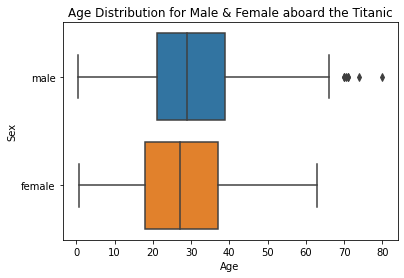

In [36]:
sns.boxplot(
    df,
    x="Age",
    y="Sex"
).set(title="Age Distribution for Male & Female aboard the Titanic")

--------------

In [12]:
male_data = df[df.Sex == "male"]
male_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [13]:
female_data = df[df.Sex == "female"]
female_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:xlabel='Age'>

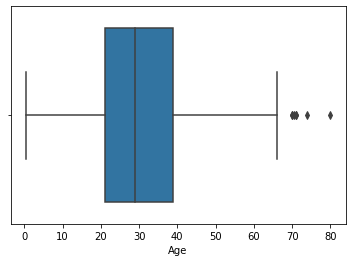

In [14]:
sns.boxplot(
    male_data,
    x="Age"
)

<AxesSubplot:xlabel='Age'>

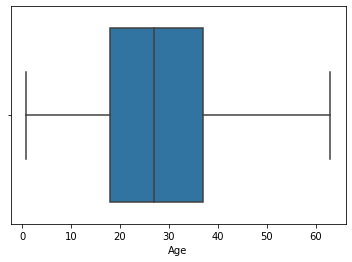

In [15]:
sns.boxplot(
    female_data,
    x="Age"
)

In [19]:
male_data.Age.describe(), female_data.Age.describe()

(count    453.000000
 mean      30.726645
 std       14.678201
 min        0.420000
 25%       21.000000
 50%       29.000000
 75%       39.000000
 max       80.000000
 Name: Age, dtype: float64,
 count    261.000000
 mean      27.915709
 std       14.110146
 min        0.750000
 25%       18.000000
 50%       27.000000
 75%       37.000000
 max       63.000000
 Name: Age, dtype: float64)

Q3. Show with 2 separate histogram plots, the age distributions for all passengers who (1) survived (2) died

In [22]:
survived_data = df[df.Survived == 1]
survived_data.Survived.unique()

array([1], dtype=int64)

In [24]:
died_data = df[df.Survived == 0]
died_data.Survived.unique()

array([0], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Count'>

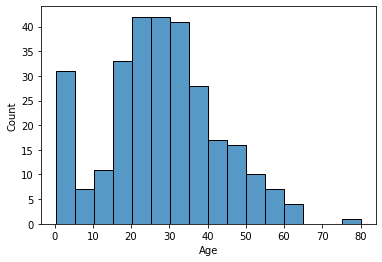

In [26]:
sns.histplot(
    survived_data,
    x="Age"
)

<AxesSubplot:xlabel='Age', ylabel='Count'>

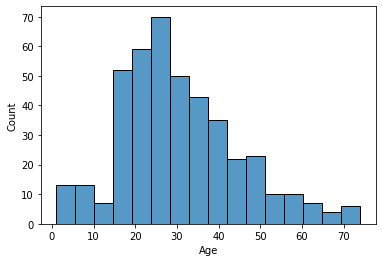

In [27]:
sns.histplot(
    died_data,
    x="Age"
)

- Older people mostly didn't survive but, there is some exceptions.
- Children has higher change to survive the sinking.
- Adults mostly help children and elders than themselves.

Q4. Show with a (plot of your choice) the different ports each passenger embarked at?

<AxesSubplot:xlabel='Embarked', ylabel='count'>

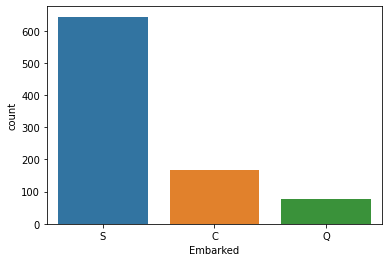

In [28]:
sns.countplot(
    df,
    x="Embarked"
)

Q5. Show with plots of your choice, the socio-economic status (SES) distributions for passengers who embarked on the ship and passengers who survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

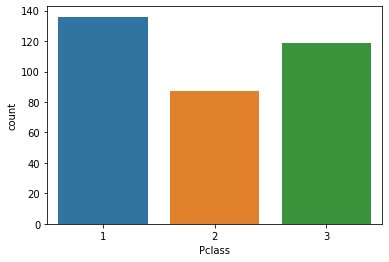

In [33]:
sns.countplot(
    survived_data,
    x="Pclass"
)

Most likely survived people from 1st class. 

#### Preprocessing

Q6. Which columns should be dropped from the final data representation for modeling?

In [32]:
cols_to_drop = ["Name", "Ticket", "Cabin"]
df_model =  df.drop(columns=cols_to_drop)

Label Encoding: Converting categorical features to numerical for training

In [33]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels into numerical 
sex_le = LabelEncoder().fit(df.Sex)
df_model["Sex"] = sex_le.transform(df.Sex)

embarked_le = LabelEncoder().fit(df.Embarked)
df_model["Embarked"] = embarked_le.transform(df.Embarked)

df_model.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [35]:
from sklearn.model_selection import train_test_split

X, y = df_model.loc[:, ~(df_model.columns.isin(["Survived"]))], df_model.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)